### Clustering for dataset exploration

In [1]:
# Import KMeans
from sklearn.cluster import KMeans
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, :2]
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

In [6]:
# Fit model to points
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
# Determine the cluster labels of new_points: labels
labels = model.predict(X_test)
labels

array([2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       0, 2, 2, 1, 1, 1], dtype=int32)

In [8]:
accuracy_score(y_test, labels)

0.58

In [9]:
import matplotlib.pyplot as plt

In [15]:
xs = X_test[:,0]
ys = X_test[:,1]

In [18]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids

array([[4.96451613, 3.37741935],
       [6.84827586, 3.07931034],
       [5.725     , 2.6775    ]])

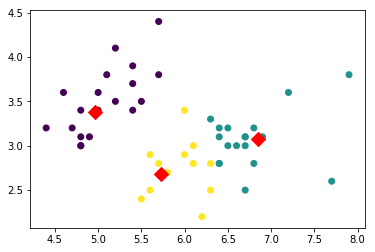

In [26]:
plt.scatter(xs,ys,c=labels)
plt.scatter(centroids_x, centroids_y, marker='D', s=100, c = 'red')

### Evaluating a clustering

In [40]:
dict(zip(range(3), iris.target_names))

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [32]:
import pandas as pd

In [49]:
df = pd.DataFrame({'labels':labels, 'species': y_test})
df.species = df.species.replace(dict(zip(range(3), iris.target_names)))
df.head(4)

,labels,species
0,2,versicolor
1,0,setosa
2,1,virginica
3,2,versicolor


In [51]:
pd.crosstab(df['labels'], df['species'])

species,setosa,versicolor,virginica
labels,,,
0,19,0,0
1,0,6,12
2,0,9,4


#### Inertia measure

- Inertia measures cluster quality. 
- The lower the better
- Distance from each sample to centroid of its cluster

K-means minimizes the inertia

In [52]:
model.inertia_

24.10991129032258

In [61]:
inertia = list(range(1,15))
for i in inertia:
    model = KMeans(n_clusters=i)
    model.fit(X_train)
    inertia[i-1] = model.inertia_

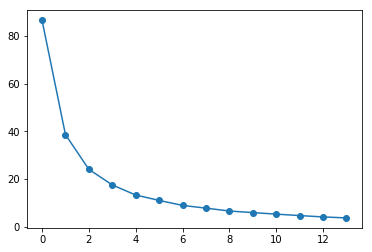

In [63]:
plt.plot(inertia, '-o')

Trade-off: tigth clusters (low inertia) vs not too many clusters

Rule of thumb: choose point where inertia begins to decrease more slowly

### Transforming features for better clustering

- StandartScaler - so each feature have mean 0 and variance 1 
- MaxAbsScaler
- Normaizer

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [72]:
scaler.transform(X_test)[:4]

array([[ 0.34288234, -0.50470526],
       [-0.13835603,  1.88726279],
       [ 2.26783585, -0.98309887],
       [ 0.22257275, -0.26550845]])

In [73]:
kmeans = KMeans(n_clusters=3)

In [74]:
from sklearn.pipeline import make_pipeline

In [75]:
pipeline = make_pipeline(scaler, kmeans)

In [76]:
pipeline.fit(X_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [81]:
labels = pipeline.predict(X_train)
labels

array([2, 1, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2,
       1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1,
       2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 0, 2, 2, 0, 2, 1], dtype=int32)

In [82]:
df = pd.DataFrame({'labels':labels, 'species': y_train})
df.species = df.species.replace(dict(zip(range(3), iris.target_names)))
pd.crosstab(df['labels'], df['species'])

species,setosa,versicolor,virginica
labels,,,
0,30,0,0
1,0,8,22
2,1,27,12


In [84]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

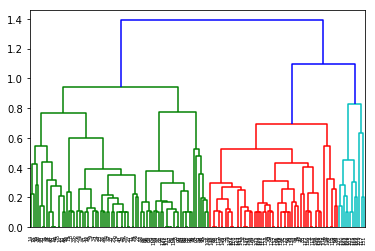

In [95]:
mergings = linkage(X, method='centroid')
dendrogram(mergings, leaf_font_size=5)
plt.show()

In [97]:
labels = fcluster(mergings, 1, criterion='distance')

df = pd.DataFrame({'labels':labels, 'species': y})
df.species = df.species.replace(dict(zip(range(3), iris.target_names)))
pd.crosstab(df['labels'], df['species'])


species,setosa,versicolor,virginica
labels,,,
1,50,24,6
2,0,26,32
3,0,0,12


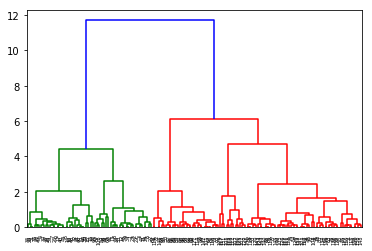

In [98]:
mergings = linkage(X, method='ward')
dendrogram(mergings, leaf_font_size=5)
plt.show()

In [104]:
labels = fcluster(mergings, 4.5, criterion='distance')

df = pd.DataFrame({'labels':labels, 'species': y})
df.species = df.species.replace(dict(zip(range(3), iris.target_names)))
pd.crosstab(df['labels'], df['species'])


species,setosa,versicolor,virginica
labels,,,
1,50,5,1
2,0,23,7
3,0,0,12
4,0,22,30


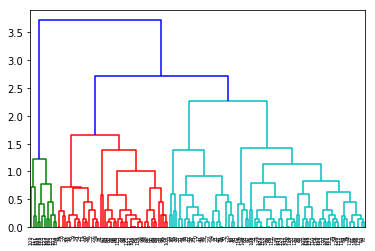

In [105]:
mergings = linkage(X, method='complete')
dendrogram(mergings, leaf_font_size=5)
plt.show()

In [108]:
labels = fcluster(mergings, 2, criterion='distance')

df = pd.DataFrame({'labels':labels, 'species': y})
df.species = df.species.replace(dict(zip(range(3), iris.target_names)))
pd.crosstab(df['labels'], df['species'])


species,setosa,versicolor,virginica
labels,,,
1,0,0,12
2,20,24,6
3,30,0,0
4,0,26,32
